In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Declaring Global Parameters

In [2]:
a = 15 # FORS Tree Height
# k = 10 # FORS Tree Number
val_arr = []

In [3]:
parameters = {
    "128S" : {
        "n":16,
        "h":66,
        "d":11,
        "k":9,
        "w":128,
        "a":13
    },
    "128F" : {
        "n":16,
        "h":63,
        "d":21,
        "k":19,
        "w":16,
        "a":9
    },
    "192S" : {
        "n":24,
        "h":63,
        "d":11,
        "k":13,
        "w":128,
        "a":15
    },
    "192F" : {
        "n":24,
        "h":63,
        "d":21,
        "k":30,
        "w":16,
        "a":9
    },
    "256S" : {
        "n":32,
        "h":66,
        "d":11,
        "k":19,
        "w":64,
        "a":14
    },
    "256F" : {
        "n":32,
        "h":64,
        "d":16,
        "k":34,
        "w":16,
        "a":10
    },
}

m = b"No one knows the reason for all this, but it is probably quantum. - Pyramids, Terry Pratchett (1989)"

# SPHINCS+ 

In [4]:
from package.sphincs import Sphincs
from package.sphincsc import SphincsC

In [5]:
def SphincsUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = Sphincs()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except:
        
        print(name + " Failed")
    
    print("-"*50, "\n")

    return di


In [6]:
def SphincsCUtil(n, h, d, w, a, k, name, cf=1):
    sphincsc = SphincsC()
    di= {}
    sphincsc.set_n(n)
    sphincsc.set_h(h)
    sphincsc.set_d(d)
    sphincsc.set_w(w)
    sphincsc.set_a(a)
    sphincsc.set_k(k)
    sphincsc.set_cf(cf)
    
    start = time.time()
    sk, pk = sphincsc.generate_key_pair()
    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk))
    print("Public Key Size: ", len(pk))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk) 
    di["PK Size"] = len(pk)
    di["Key Gen Time"]  = key_gen_time

    try:
    
        start = time.time()
        signature = sphincsc.sign(m, sk)
        end = time.time()
        sign_time = end-start
        print("Time Taken to Sign", sign_time)
        print("Signature Size", len(signature), "bytes")

        start = time.time()
        verify_true = sphincsc.verify(m, signature, pk)
        end = time.time()
        verify_time = end-start
        print("Time Taken to Verify", verify_time)
        print("Is signature correct ? ", verify_true)

        di["Sign Size"] = len(signature)
        di["Sign Time"] = sign_time
        di["Verify Time"] = verify_time
        
    except Exception as e:
        
        print(name + " Failed")
        print(e)
    
    print("-"*50, "\n")

    return di


## SPHINCS+128S

In [7]:
models = ["SPHINCS+", "SPHINCS+C1", "SPHINCS+C2", "SPHINCS+C3", "SPHINCS+C4"]
parameter_names = list(parameters.keys())

for cf, name in enumerate(models):
    if cf == 0:
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsUtil(**param, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
            print("-"*50, "\n")
    else:
        if name.endswith("F"):
            continue
        for param_set in parameter_names:
            print(name + ' ' + param_set)
            param = parameters[param_set]
            d = SphincsCUtil(**param, cf=cf, name = name + ' ' + param_set)
            d["Name"] = name + ' ' + param_set
            val_arr.append(d)
    

SPHINCS+ 128S
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.13550996780395508
Time Taken to Sign 2.920398235321045
Signature Size 9248 bytes
Time Taken to Verify 0.011500358581542969
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 128F
Secret Key Size:  64
Public Key Size:  32
Time Taken to Generate Keys 0.01598954200744629
Time Taken to Sign 0.5408780574798584
Signature Size 15824 bytes
Time Taken to Verify 0.021745681762695312
Is signature correct ?  True
-------------------------------------------------- 

-------------------------------------------------- 

SPHINCS+ 192S
Secret Key Size:  96
Public Key Size:  48
Time Taken to Generate Keys 0.09734892845153809
Time Taken to Sign 9.636476755142212
Signature Size 19800 bytes
Time Taken to Verify 0.015956878662109375
Is signature correct ?  False
-------------------------------------------------- 

-----------------

Secret Key Size:  128
Public Key Size:  64
Time Taken to Generate Keys 0.6542611122131348
Time Taken to Sign 294.6824266910553
Signature Size 25253 bytes
Time Taken to Verify 0.11420106887817383
Is signature correct ?  True
-------------------------------------------------- 

SPHINCS+C2 256F
Value of n changed
32
Recalculation called
Value of h changed
64
Recalculation called
Value of d changed
16
Recalculation called
Value of w changed
16
Recalculation called
Value of a changed
10
Recalculation called
Value of  changed
34
Recalculation called
Value of cf changed
2
Recalculation called
Secret Key Size:  128
Public Key Size:  64
Time Taken to Generate Keys 0.06554365158081055
Time Taken to Sign 2.0658929347991943
Signature Size 44954 bytes
Time Taken to Verify 0.03388023376464844
Is signature correct ?  True
-------------------------------------------------- 

SPHINCS+C3 128S
Value of n changed
16
Recalculation called
Value of h changed
66
Recalculation called
Value of d changed
11
Reca

In [8]:
df = pd.DataFrame(val_arr)

In [9]:
df.to_csv("result.csv", encoding='utf-8', index=False)

In [164]:
df.head(len(val_arr))

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Name
0,64,32,0.135510,9248,2.920398,0.011500,SPHINCS+ 128S
1,64,32,0.015990,15824,0.540878,0.021746,SPHINCS+ 128F
2,96,48,0.097349,19800,9.636477,0.015957,SPHINCS+ 192S
3,96,48,0.023936,34440,0.829886,0.029955,SPHINCS+ 192F
4,128,64,0.251036,34848,9.146829,0.019947,SPHINCS+ 256S
5,128,64,0.060875,48352,1.715059,0.029918,SPHINCS+ 256F
6,64,32,0.573969,6245,193.070070,0.092049,SPHINCS+C1 128S
7,64,32,0.017373,14689,0.674937,0.021908,SPHINCS+C1 128F
8,96,48,0.412878,13381,238.754114,0.144296,SPHINCS+C1 192S
9,96,48,0.026752,32719,0.981230,0.033422,SPHINCS+C1 192F


In [165]:
df = df.round(3) 

In [166]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label, colormap='viridis'):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(16, 10))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['g', 'y', 'm', 'b', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            ax.text((x + bar_width / 2)-0.4, y, str(y), ha='center', va='bottom')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_label)
    ax.legend()


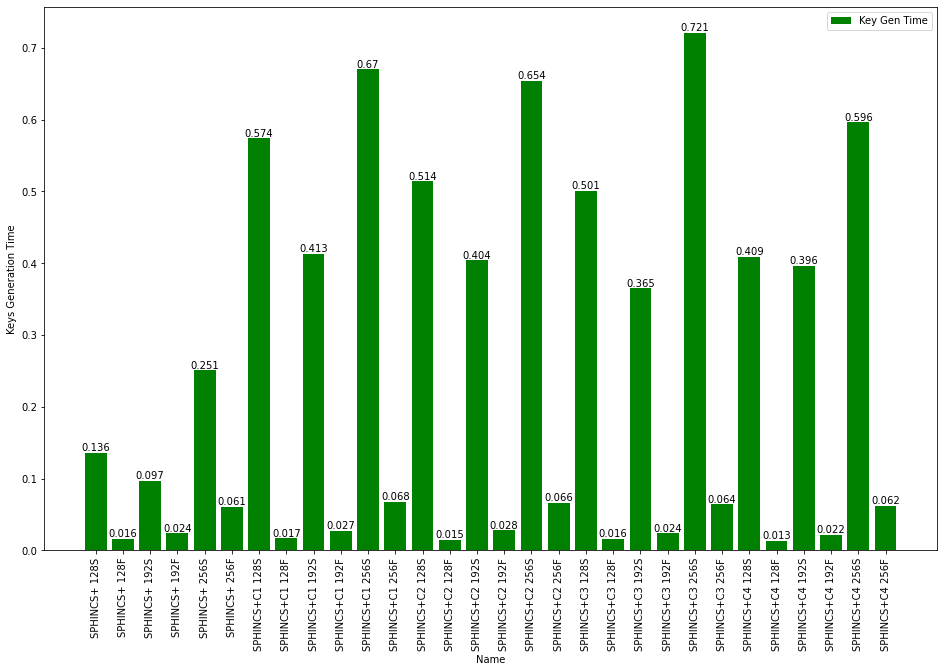

In [167]:
plot_bar_multi_columns(df, 'Name', ["Key Gen Time"], "Keys Generation Time", 'hsv')

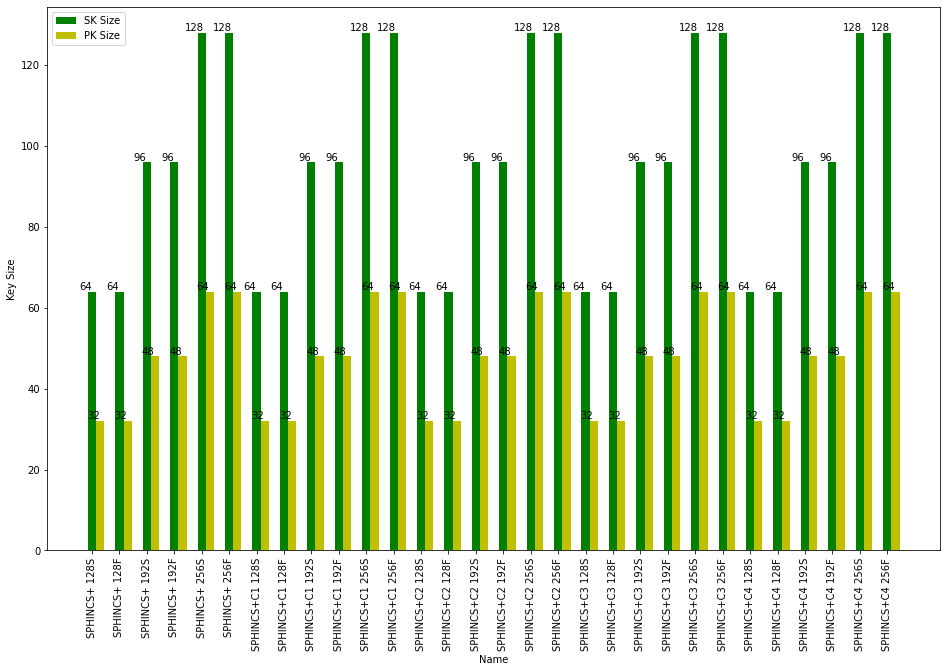

In [168]:
plot_bar_multi_columns(df, 'Name', ["SK Size","PK Size"], "Key Size")

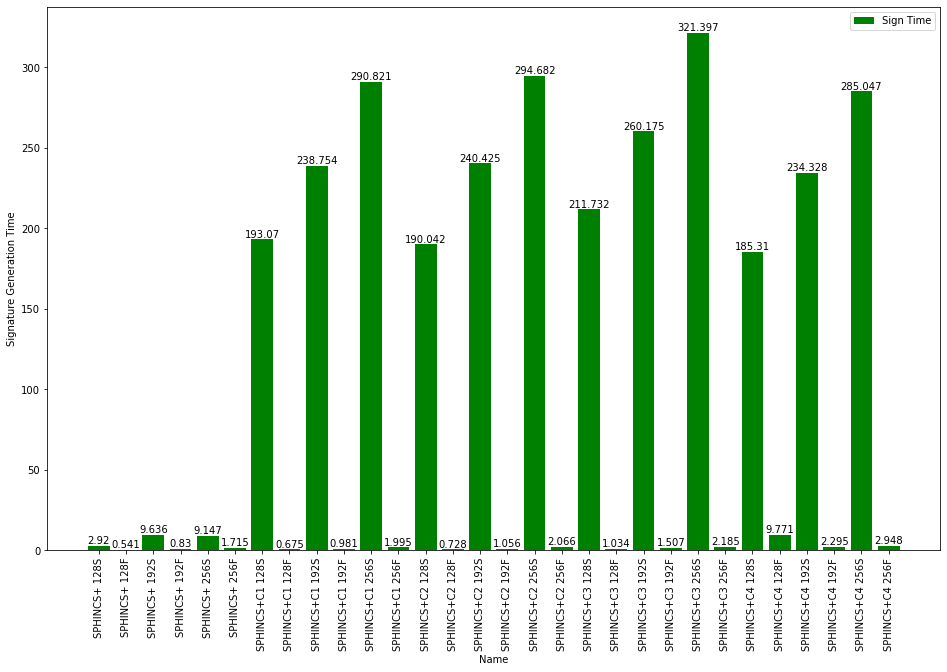

In [169]:
plot_bar_multi_columns(df, 'Name', ["Sign Time"], "Signature Generation Time")

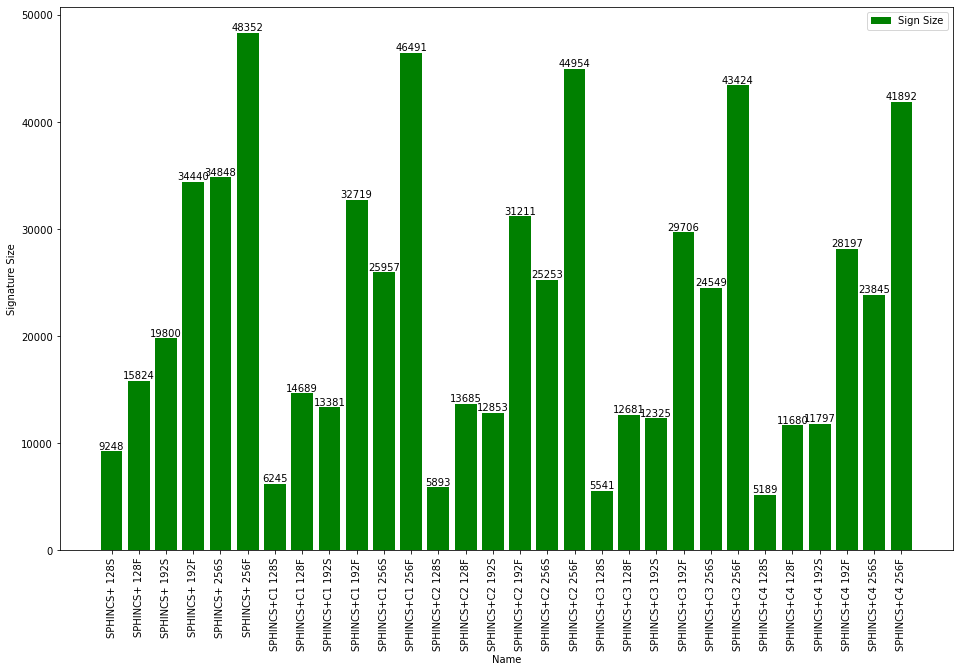

In [170]:
plot_bar_multi_columns(df, 'Name', ["Sign Size"], "Signature Size")

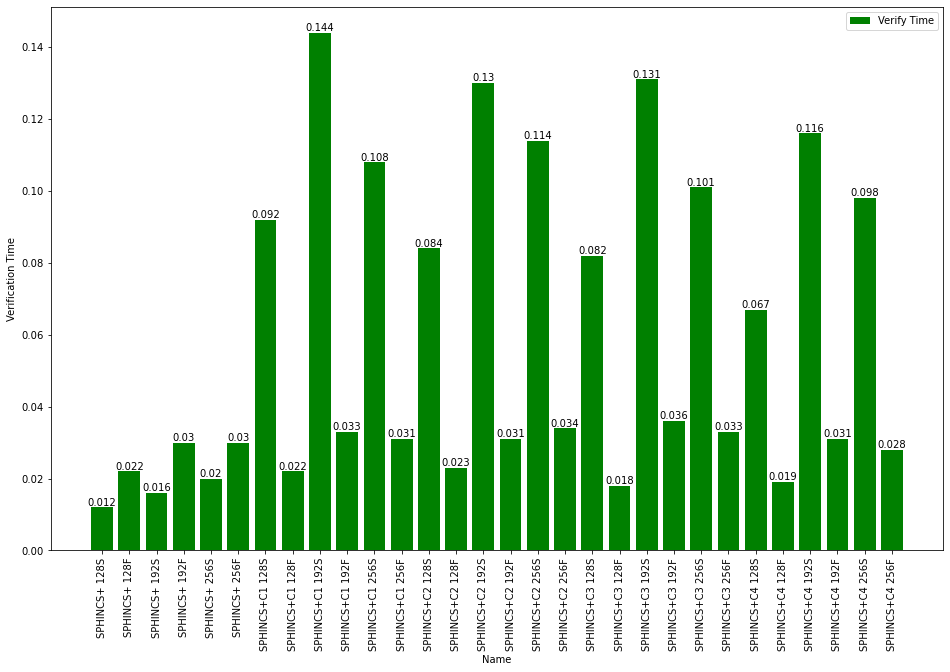

In [171]:
plot_bar_multi_columns(df, 'Name', ["Verify Time"], "Verification Time")

In [ ]:
df